#### Imports

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import plotly.offline as pyoff
import plotly.graph_objs as go
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

from __future__ import division
from chart_studio import plotly
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from scipy import stats
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from datetime import datetime, timedelta
from sklearn.manifold import TSNE
from pandas_profiling import ProfileReport
from sklearn import metrics
from pandasql import sqldf


import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

## Hierarchical Clustering

Points of a dataset:
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-10-32.png"
    style="width:200px; float: center;"></img>
    
Assign each of these points to a separate cluster:
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-11-28.png"
    style="width:200px; float: center;"></img>
    
Based on the similarity of these clusters, we can combine the most similar clusters together and repeat this process until only a single cluster is left:
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-12-35.png"
    style="width:200px; float: center;"></img>

### Types of Hierarchical Clustering
There are mainly two types of hierarchical clustering:

- **Agglomerative hierarchical**
- Divisive Hierarchical clustering

## 1 Agglomerative Clustering

- Most common type of hierarchical clustering used to group objects in clusters based on their similarity. 
- **AGNES** (Agglomerative Nesting) 
-  Works in a **“bottom-up”** manner
- The algorithm starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named **dendrogram**

_" Each object is initially considered as a single-element cluster (leaf). At each step of the algorithm, the two clusters that are the most similar are combined into a new bigger cluster (nodes). This procedure is iterated until all points are member of just one single big cluster (root) (see figure below)."_



<img src="https://www.datanovia.com/en/wp-content/uploads/dn-tutorials/003-hierarchical-clustering-in-r/images/hierarchical-clustering-agnes-diana.png"
    style="width:500px; float: center;"></img>

**STEPS:**

**1. Preparing the data**
   - 6 months features data frame
   - Definition of features for RFM and Filter Features Method
    

**2. Computing (dis)similarity information between every pair of objects in the data set.**
   - Definition of features for RFM and Filter Features Method 

**3. Using linkage function to group objects into hierarchical cluster tree, based on the distance information generated at step 1. Objects/clusters that are in close proximity are linked together using the linkage function.**
   - _Ward’s_ minimum variance method: It minimizes the total within-cluster variance. At each step the pair of clusters with minimum between-cluster distance are merged.


**4. Determining where to cut the hierarchical tree into clusters. This creates a partition of the data.**
   - Biggest euclidean distance
   - Number of cluster equal to 4.


#### 6 Months dataframe

In [12]:
df = pd.read_csv('df_users.csv')
df

,CustomerUniqueIdEmailHash,num_orders,country,payment_method,order_carrier,order_shipping_price_mean,order_shipping_price_sum,order_shipping_price_last,product_qty_ordered_mean,product_qty_ordered_sum,...,num_orders_15d,net_amount_15d,num_orders_30d,net_amount_30d,num_orders_60d,net_amount_60d,num_orders_90d,net_amount_90d,will_purchase,next_order_days
0,00029736b495db897a94099c5378a6c0ac76e288,1,GB,paypal,ctbctt,5.26,5.26,5.26,3.0,3.0,...,1.0,39.03,1.0,39.03,1.0,39.03,1.0,39.03,1.0,16.0
1,00031ac41eb5b21be5b4fbc1d50dd43948e01357,1,GB,stripe,ctbdhl,0.00,0.00,0.00,4.0,4.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,1.0,54.0
2,00035cffce191437bd00adea61d73a346b3965d5,1,DE,m2epropayment,ctbctt,5.85,5.85,5.85,3.0,3.0,...,1.0,19.05,1.0,19.05,1.0,19.05,1.0,19.05,0.0,9999.0
3,0003dfdcbabb0a33168e9b5b09b1f08fb0a960f9,1,NZ,stripe,ctbctt,4.46,4.46,4.46,1.0,1.0,...,0.0,0.00,0.0,0.00,0.0,0.00,1.0,14.46,0.0,9999.0
4,00056521f6daa362ea4b49a3dfaff7e6433edb60,1,US,stripe,ctbctt,4.46,4.46,4.46,1.0,1.0,...,0.0,0.00,0.0,0.00,1.0,17.45,1.0,17.45,0.0,9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84519,fffdaf75cbff98b85a4c53a3866900ba4bf1d9dd,1,US,stripe,ctbctt,4.46,4.46,4.46,3.0,3.0,...,0.0,0.00,0.0,0.00,1.0,13.47,1.0,13.47,0.0,9999.0
84520,fffdb706d9f994e5732b6dd85bc4b181a5d3cda1,1,FR,stripe,ctbctt,2.98,2.98,2.98,1.0,1.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,9999.0
84521,fffdb9bcceac96a27529fb2b46a6a4f9c0b7c5c6,1,SG,stripe,ctbdhl,0.00,0.00,0.00,9.0,9.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,9999.0
84522,fffe3332824df69941cd74912548aeb74c10c9cf,1,SA,stripe,ctbdhl,0.00,0.00,0.00,9.0,9.0,...,0.0,0.00,0.0,0.00,1.0,129.90,1.0,129.90,0.0,9999.0


## 1.1 RFM

 - Previously, the  orginal data was **highly skewed**, therefore we will perform **log transformations** to reduce the skewness of each variable in the raw data set. 

- Before applying Hierarchical Clustering, we have to normalize the data for scalling each variable in the same. Otherwise, the model might become biased towards the variables with a higher magnitude.

In [75]:
#dataset sample of 20000
dataframe= df.sample(n=20000)

dataframe_features  = dataframe[['CustomerUniqueIdEmailHash','num_orders','product_net_amount_sum','days_since_last_buy']]
dataframe_features.rename(columns ={'num_orders':'Frequency','product_net_amount_sum':'Monetary','days_since_last_buy':'Recency'}, inplace=True)


dataframe  = dataframe[['num_orders','product_net_amount_sum','days_since_last_buy']]
dataframe.rename(columns ={'num_orders':'Frequency','product_net_amount_sum':'Monetary','days_since_last_buy':'Recency'}, inplace=True)


#Removing skewness
df_hie_log_1 = np.log(dataframe+1)

# Normalizing
scaler = StandardScaler()
scaler.fit(df_hie_log_1)
Hie_scaled_1 = scaler.transform(df_hie_log_1)

#Dataframe
Hie_scaled_1 = pd.DataFrame(Hie_scaled_1, columns=dataframe.columns)
Hie_scaled_1

,Frequency,Monetary,Recency
0,-0.297278,0.453452,-0.557669
1,-0.297278,-0.638396,-1.753132
2,2.161216,-1.024070,-0.787801
3,-0.297278,1.246465,1.056631
4,2.161216,0.229053,-0.104913
...,...,...,...
19995,-0.297278,0.416687,-0.266256
19996,-0.297278,-0.083982,0.978154
19997,-0.297278,-0.773181,-1.449244
19998,-0.297278,-0.162812,-0.372394


### Dendogram: Define optimal K

#### Average
The distance between two clusters is defined as the average distance between the elements in cluster 1 and the elements in cluster 2. 

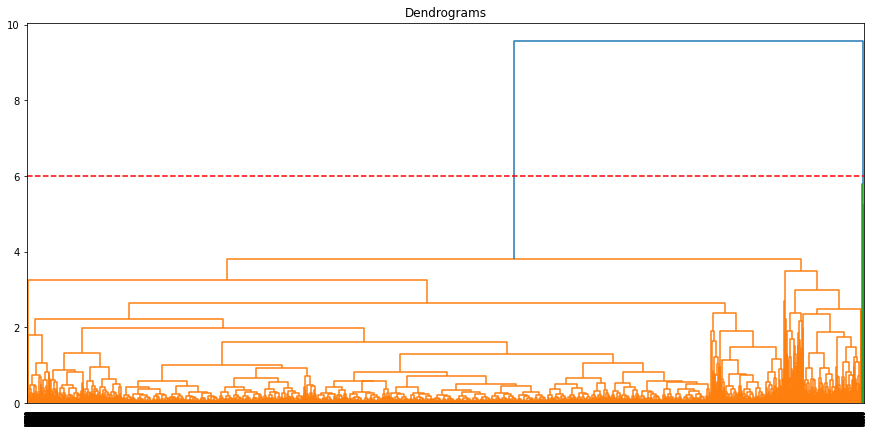

In [14]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 7))
plt.title("Dendrograms - Average Method")
dend = shc.dendrogram(shc.linkage(Hie_scaled_1, method='average'))
plt.axhline(y=6, color='r', linestyle='--')

#### Centroid
The distance between two clusters is defined as the distance between the centroid for cluster 1 (a mean vector of length p variables) and the centroid for cluster 2.

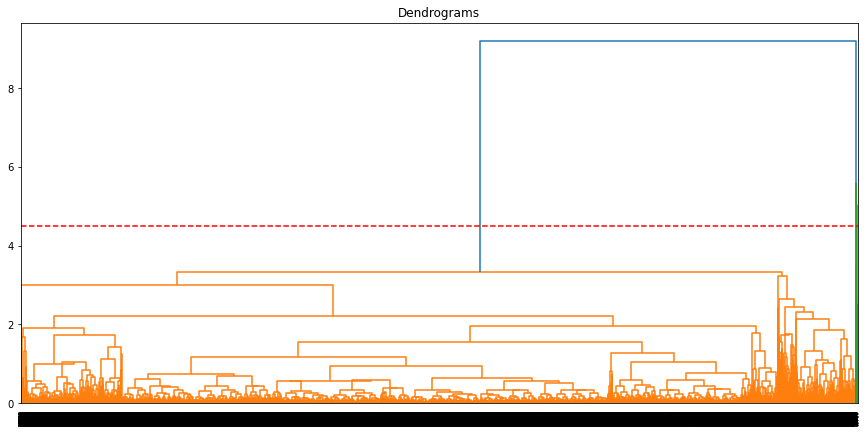

In [15]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 7))
plt.title("Dendrograms - Centroid Method")
dend = shc.dendrogram(shc.linkage(Hie_scaled_1, method='centroid'))
plt.axhline(y=4.5, color='r', linestyle='--')

#### Ward
Minimum variance method: It minimizes the total within-cluster variance. At each step the pair of clusters with minimum between-cluster distance are merged.

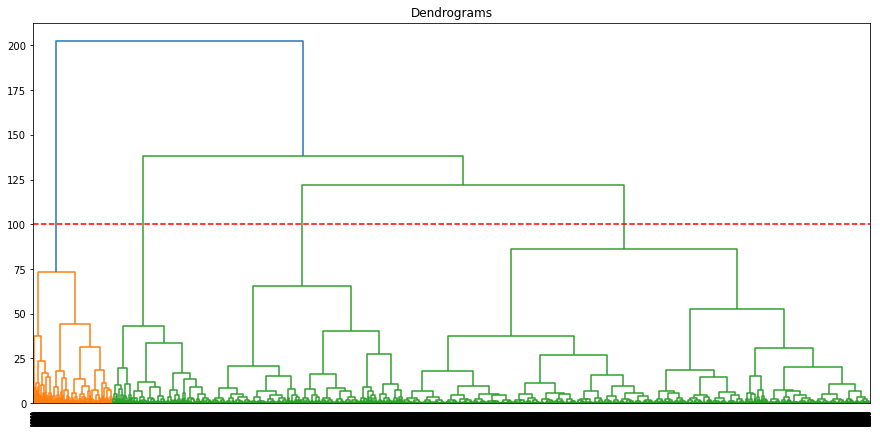

In [17]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 7))
plt.title("Dendrograms - Ward Method")
dend = shc.dendrogram(shc.linkage(Hie_scaled_1, method='ward'))
plt.axhline(y=100, color='r', linestyle='--')

#### Create cluster
- linkage = method
- affinity (default=’euclidean’). If linkage is “ward”, only “euclidean” is accepted.

In [72]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(Hie_scaled_1)

# Extract cluster labels
cluster_labels = cluster.labels_

# Create a cluster label column in original dataset
df_new = dataframe.assign(Cluster = cluster_labels)
df_new

,Frequency,Monetary,Recency,Cluster
60128,1,19.29,47,0
32576,1,57.14,86,0
66249,1,202.77,68,2
64357,3,354.28,16,1
44906,1,61.15,15,3
...,...,...,...,...
61988,1,132.55,107,2
7027,1,81.36,82,2
48695,1,18.45,40,0
52161,1,211.44,92,2


#### Visualize Clustering

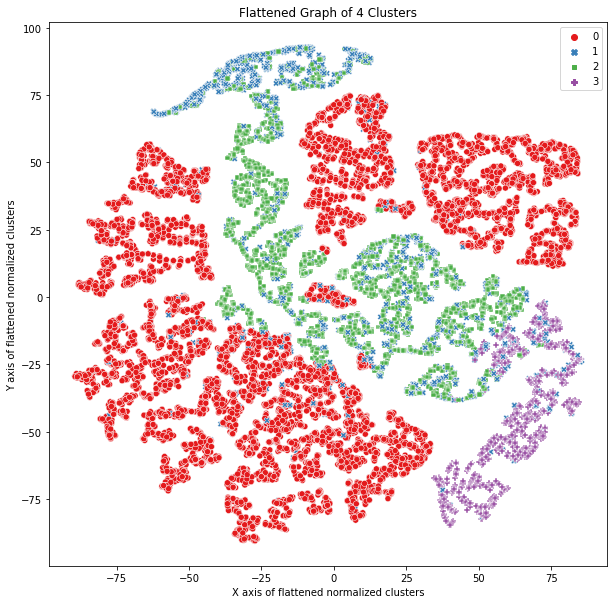

In [73]:
# Initialise TSNE
model = TSNE(random_state=1)
transformed = model.fit_transform(df_new)
    
# Plot t-SNE
plt.figure(figsize=(10, 10))
plt.title('Flattened Graph of {} Clusters'.format(4))
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
plt.xlabel('X axis of flattened normalized clusters')
plt.ylabel('Y axis of flattened normalized clusters')
plt.show()

#### Snake plot

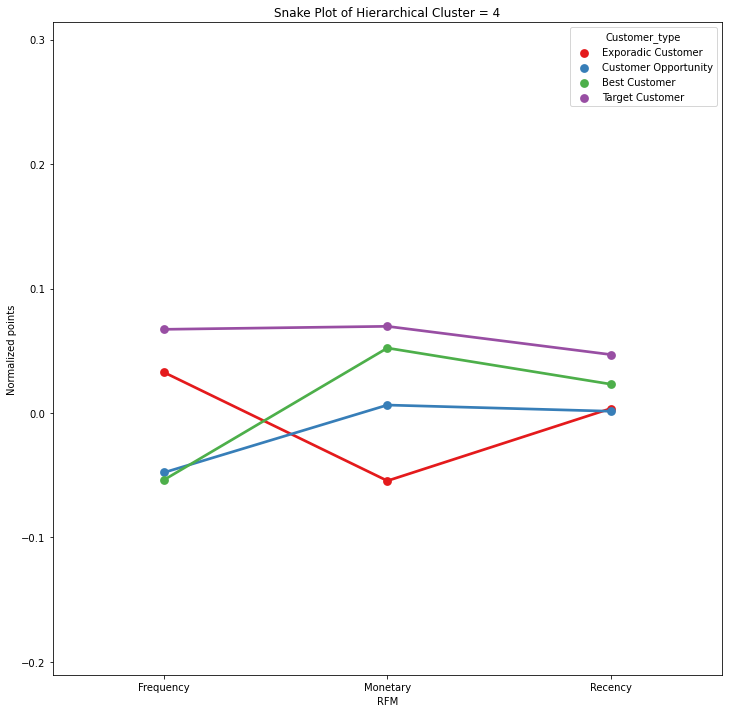

In [134]:
#df
df_new['Customer_type'] = df_new['Cluster']
df_new['Customer_type'].replace({2:'Customer Opportunity',1:'Best Customer',3:'Target Customer',0:'Exporadic Customer'}, inplace=True)


def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):
    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=df_rfm_original.index, 
                                       columns=df_rfm_original.columns)
    normalised_df_rfm['Customer_type'] = df_rfm_kmeans['Customer_type']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['CustomerUniqueIdEmailHash', 'Customer_type'],
                        value_vars=['Frequency','Monetary','Recency'], 
                        var_name='RFM', 
                        value_name='Normalized points')

    plt.xlabel('RFM')
    plt.ylabel('Normalized points')
    sns.pointplot(data=df_melt, x='RFM', y='Normalized points', hue='Customer_type', errwidth=0, palette='Set1') 
    return

plt.figure(figsize=(12, 12))
plt.title('Snake Plot of Hierarchical Cluster = 4')
snake_plot(Hie_scaled_1, df_new, dataframe_features)

#### Interpretation

- **Customer Opportunity**: Consolidade as a customer
        - High Recency, a great opportunity to consolidate as a customer.
        - Low Frequency, recently bought a product, so the frequency will be low 
        - Medium Monetary

- **Best Customer**: Cannot lose the client
        - High Recency, bought recently.
        - High Frequency, frequently buyer 
        - Hgih Monetary, spend more than the average customers

- **Target Customer**: Work hard to be a closer client
        - Medium Recency, a great opportunity to consolidate as a customer.
        - Medium Frequency, recently bought a product, so the frequency will be low 
        - Medium Monetary

- **Exporadic Customer**: Everything from here is a bonus.
        - Low Recency, a great opportunity to consolidate as a customer.
        - Low Frequency, recently bought a product, so the frequency will be low 
        - Low Monetary

In [96]:
def rfm_values(df):

    df_new = df.groupby(['Customer_type','Cluster']).agg({
        'Recency': ['mean','median'],
        'Frequency': ['mean','median'],
        'Monetary': ['mean','median','count']
    }).round(2)
    
    return df_new

rfm_values(df_new)

Recency        Frequency        Monetary          \
                                mean median      mean median     mean  median   
Customer_type        Cluster                                                    
Best Customer        1         47.83     37      2.46      2   237.91  148.66   
Customer Opportunity 2         67.96     55      1.00      1   129.92  118.68   
Exporadic Customer   0         87.64     84      1.00      1    27.48   22.81   
Target Customer      3          7.15      7      1.00      1    30.41   26.90   

                                     
                              count  
Customer_type        Cluster         
Best Customer        1         1912  
Customer Opportunity 2         4640  
Exporadic Customer   0        11673  
Target Customer      3         1775

## 1.2 Feature Importance 

 - Previously, the  orginal data was **highly skewed**, therefore we will perform **log transformations** to reduce the skewness of each variable in the raw data set. 

- Before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. Otherwise, the model might become biased towards the variables with a higher magnitude.

In [87]:
dataframe_2 = df.sample (n=20000)

df_int = dataframe_2

df_features = dataframe_2[['product_total_amount_trend','product_net_amount_trend','product_qty_ordered_trend',\
                  'product_total_discount_trend','num_orders_90d','free_shipping_sum','with_discount_sum',\
                  'with_discount_pct','order_shipping_price_trend','number_brands_sum','num_orders_60d',\
                  'product_net_amount_sum','product_total_amount_sum','free_shipping_pct','number_sku_sum']]

dataframe_2 = dataframe_2[['product_total_amount_trend','product_net_amount_trend','product_qty_ordered_trend',\
                  'product_total_discount_trend','num_orders_90d','free_shipping_sum','with_discount_sum',\
                  'with_discount_pct','order_shipping_price_trend','number_brands_sum','num_orders_60d',\
                  'product_net_amount_sum','product_total_amount_sum','free_shipping_pct','number_sku_sum']]

#Removing skewness
df_hie_log_2 = np.log(dataframe_2+1)

# Normalizing
scaler = StandardScaler()
scaler.fit(df_hie_log_2)
Hie_scaled_2 = scaler.transform(df_hie_log_2)

#Dataframe
Hie_scaled_2 = pd.DataFrame(Hie_scaled_2, columns=dataframe_2.columns)
Hie_scaled_2

,product_total_amount_trend,product_net_amount_trend,product_qty_ordered_trend,product_total_discount_trend,num_orders_90d,free_shipping_sum,with_discount_sum,with_discount_pct,order_shipping_price_trend,number_brands_sum,num_orders_60d,product_net_amount_sum,product_total_amount_sum,free_shipping_pct,number_sku_sum
0,-0.021469,-0.000652,-0.036163,-0.028546,0.650866,-0.454247,-0.807795,-0.822613,0.039106,-0.466842,0.989228,0.680695,0.572722,-0.471083,-0.660466
1,-0.021469,-0.000652,-0.036163,-0.028546,-1.268639,-0.454247,1.058574,1.263115,0.039106,-0.466842,-0.918855,0.168005,0.343264,-0.471083,0.119153
2,-0.021469,-0.000652,-0.036163,-0.028546,0.650866,-0.454247,-0.807795,-0.822613,0.039106,-0.466842,0.989228,0.102406,-0.000653,-0.471083,-0.660466
3,-0.021469,-0.000652,-0.036163,-0.028546,-1.268639,-0.454247,-0.807795,-0.822613,0.039106,-0.466842,-0.918855,0.232640,0.128474,-0.471083,0.119153
4,-0.021469,-0.000652,-0.036163,-0.028546,0.650866,-0.454247,1.058574,1.263115,0.039106,-0.466842,0.989228,-1.175092,-1.003353,-0.471083,-0.660466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.021469,-0.000652,-0.036163,-0.028546,-1.268639,1.752419,-0.807795,-0.822613,0.039106,-0.466842,-0.918855,1.213398,1.100900,2.184374,0.672301
19996,-0.021469,-0.000652,-0.036163,-0.028546,0.650866,-0.454247,-0.807795,-0.822613,0.039106,-0.466842,0.989228,0.251581,0.147254,-0.471083,-0.660466
19997,-0.021469,-0.000652,-0.036163,-0.028546,0.650866,-0.454247,-0.807795,-0.822613,0.039106,-0.466842,0.989228,-0.364245,-0.463339,-0.471083,-0.660466
19998,-0.021469,-0.000652,-0.036163,-0.028546,0.650866,-0.454247,1.058574,1.263115,0.039106,0.701413,0.989228,-0.414769,-0.308955,-0.471083,0.119153


#### Create Cluster

- linkage = method
- affinity (default=’euclidean’). If linkage is “ward”, only “euclidean” is accepted.

In [88]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(Hie_scaled_2)

# Extract cluster labels
cluster_labels = cluster.labels_

# Create a cluster label column in original dataset
df_new_2 = dataframe_2.assign(Cluster = cluster_labels)

df_new_2

,product_total_amount_trend,product_net_amount_trend,product_qty_ordered_trend,product_total_discount_trend,num_orders_90d,free_shipping_sum,with_discount_sum,with_discount_pct,order_shipping_price_trend,number_brands_sum,num_orders_60d,product_net_amount_sum,product_total_amount_sum,free_shipping_pct,number_sku_sum,Cluster
82768,1.000000,1.000000,1.0,1.0,1.0,0,0,0.0,1.0,1,1.0,79.82,79.82,0.0,1,1
15963,1.000000,1.000000,1.0,1.0,0.0,0,1,1.0,1.0,1,0.0,47.28,63.05,0.0,2,2
70119,1.000000,1.000000,1.0,1.0,1.0,0,0,0.0,1.0,1,1.0,44.20,44.20,0.0,1,1
60554,1.000000,1.000000,1.0,1.0,0.0,0,0,0.0,1.0,1,0.0,50.52,50.52,0.0,2,1
35210,1.000000,1.000000,1.0,1.0,1.0,0,1,1.0,1.0,1,1.0,11.52,15.36,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65098,1.000000,1.000000,1.0,1.0,0.0,1,0,0.0,1.0,1,0.0,137.04,137.04,1.0,3,0
5443,1.000000,1.000000,1.0,1.0,1.0,0,0,0.0,1.0,1,1.0,51.51,51.51,0.0,1,1
59048,1.000000,1.000000,1.0,1.0,1.0,0,0,0.0,1.0,1,1.0,27.28,27.28,0.0,1,1
69084,1.000000,1.000000,1.0,1.0,1.0,0,1,1.0,1.0,2,1.0,25.88,32.07,0.0,2,2


#### Vizualize Clustering

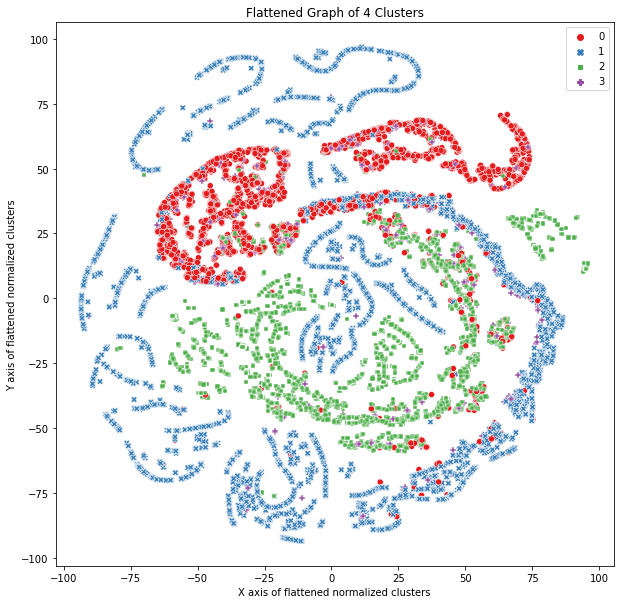

In [85]:
# Initialise TSNE
model = TSNE(random_state=1)
transformed = model.fit_transform(df_new_2)
    
# Plot t-SNE
plt.figure(figsize=(10, 10))
plt.title('Flattened Graph of {} Clusters'.format(4))
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
plt.xlabel('X axis of flattened normalized clusters')
plt.ylabel('Y axis of flattened normalized clusters')
plt.show()

In [110]:
#Create Dataset to Analyse the data
df_analysis=pd.merge(df_int,df_new_2, right_index=True, left_index=True)
df_analysis = df_analysis[['CustomerUniqueIdEmailHash', 'num_orders','product_net_amount_sum_y','days_since_last_buy','Cluster']]
df_analysis.rename(columns ={'num_orders':'Frequency','product_net_amount_sum_y':'Monetary','days_since_last_buy':'Recency'}, inplace=True)

#Df features
df_features_ana = df_analysis[['CustomerUniqueIdEmailHash','Frequency','Monetary','Recency']]

#df_cluster
df_cluster = df_analysis[['Frequency','Monetary','Recency','Cluster']]

#Scaled dataset
normalize2= df_analysis[['Frequency','Monetary','Recency']]
#Removing skewness
df_hie_log_ana = np.log(normalize2+1)
# Normalizing
scaler = StandardScaler()
scaler.fit(df_hie_log_ana)
Hie_scaled_ana = scaler.transform(df_hie_log_ana)
#Dataframe
Hie_scaled_ana = pd.DataFrame(Hie_scaled_ana, columns=normalize2.columns)


#### Snake Plot

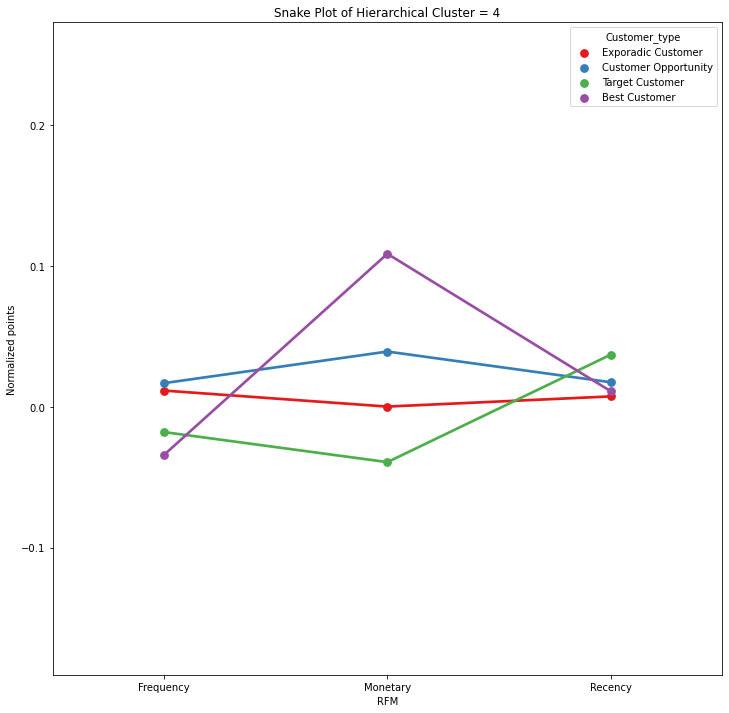

In [133]:
#df
df_cluster['Customer_type'] = df_cluster['Cluster']
df_cluster['Customer_type'].replace({2:'Customer Opportunity',3:'Best Customer',0:'Target Customer',1:'Exporadic Customer'}, inplace=True)


def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):
    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=df_rfm_original.index, 
                                       columns=df_rfm_original.columns)
    normalised_df_rfm['Customer_type'] = df_rfm_kmeans['Customer_type']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['CustomerUniqueIdEmailHash', 'Customer_type'],
                        value_vars=['Frequency','Monetary','Recency'], 
                        var_name='RFM', 
                        value_name='Normalized points')

    plt.xlabel('RFM')
    plt.ylabel('Normalized points')
    sns.pointplot(data=df_melt, x='RFM', y='Normalized points', hue='Customer_type', errwidth=0, palette='Set1') 
    return

plt.figure(figsize=(12, 12))
plt.title('Snake Plot of Hierarchical Cluster = 4')
snake_plot(Hie_scaled_ana, df_cluster, df_features_ana)

#### Interpretation

- **Customer Opportunity**: Consolidade as a customer
        - High Recency, a great opportunity to consolidate as a customer.
        - Low Frequency, recently bought a product, so the frequency will be low 
        - Medium Monetary

- **Best Customer**: Cannot lose the client
        - High Recency, bought recently.
        - High Frequency, frequently buyer 
        - Hgih Monetary, spend more than the average customers

- **Target Customer**: Work hard to be a closer client
        - Medium Recency, a great opportunity to consolidate as a customer.
        - Medium Frequency, recently bought a product, so the frequency will be low 
        - Medium Monetary

- **Exporadic Customer**: Everything from here is a bonus.
        - Low Recency, a great opportunity to consolidate as a customer.
        - Low Frequency, recently bought a product, so the frequency will be low 
        - Low Monetary

In [114]:
def rfm_values(df):

    df_new = df.groupby(['Customer_type','Cluster']).agg({
        'Recency': ['mean','median'],
        'Frequency': ['mean','median'],
        'Monetary': ['mean','median','count']
    }).round(2)
    
    return df_new

rfm_values(df_cluster)

Recency        Frequency        Monetary          \
                                mean median      mean median     mean  median   
Customer_type        Cluster                                                    
Best Customer        3         50.55   40.5      2.37      2   163.63  121.76   
Customer Opportunity 2         54.72   39.0      1.02      1    34.69   25.98   
Exporadic Customer   1         83.71   79.0      1.03      1    35.13   26.54   
Target Customer      0         70.80   63.0      1.41      1   202.45  142.89   

                                    
                             count  
Customer_type        Cluster        
Best Customer        3         556  
Customer Opportunity 2        5679  
Exporadic Customer   1        9896  
Target Customer      0        3869

## Which is the best result ?

#### Agglomerative Hierarchical Clustering:  RFM 6 Months

In [119]:
df_new['Customer_type'].value_counts(normalize=True)*100

Exporadic Customer      58.365
Customer Opportunity    23.200
Best Customer            9.560
Target Customer          8.875
Name: Customer_type, dtype: float64

#### Agglomerative Hierarchical Clustering:  Filter Feature Method 6 Months

In [120]:
df_cluster['Customer_type'].value_counts(normalize=True)*100

Exporadic Customer      49.480
Customer Opportunity    28.395
Target Customer         19.345
Best Customer            2.780
Name: Customer_type, dtype: float64

### Silhouette Coefficient

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

- **1:** Means clusters are well apart from each other and clearly distinguished.

- **0:** Means clusters are indifferent, or we can say that the distance between clusters is not significant.

- **-1:** Means clusters are assigned in the wrong way.


                                            Silhouette Score = (b-a)/max(a,b)

where:

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.

Source: https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

In [131]:
df_new = df_new[['Frequency','Recency','Monetary','Cluster']]

#Evaluation
RFM = metrics.silhouette_score(df_new,df_new['Cluster'])
Feature_Selecting = metrics.silhouette_score(df_new_2,df_new_2['Cluster'])

# silhoutte
silhoutte_scores = [['RFM 6 months','Filter Feature Method 6 Months'],[RFM,Feature_Selecting]]
scores = pd.DataFrame(silhoutte_scores, index=['methodology', 'silhoutte_scores']).T
scores

,methodology,silhoutte_scores
0,RFM 6 months,0.11004
1,Filter Feature Method 6 Months,0.003693


### Davies-Bouldin

The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

The minimum score is zero, with lower values indicating better clustering.

Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html

In [132]:
#Evaluation
RFM_bouldin = metrics.davies_bouldin_score(df_new,df_new['Cluster'])
Feature_Selecting_bouldin = metrics.davies_bouldin_score(df_new_2,df_new_2['Cluster'])

#Davies-Bouldin
boldin_scores = [['RFM 6 months','Filter Feature Method 6 Months'],[RFM_bouldin,Feature_Selecting_bouldin]]
scores = pd.DataFrame(boldin_scores, index=['methodology', 'Davies_Bouldin_Scores']).T
scores

,methodology,Davies_Bouldin_Scores
0,RFM 6 months,1.711573
1,Filter Feature Method 6 Months,5.443301
